# Data Sourcing

In [1]:
#importing pandas modules to be used

import pandas as pd                    # pandas module for loading data in dataframe.
import matplotlib.pyplot as plt        # Matplotlib module for visulazing & plotting data in graphs.

import warnings                        # To remove warning in output
warnings.filterwarnings('ignore')




In [2]:
#'df' is the pandas dataframe variable containing 'loan.csv' data

df = pd.read_csv('loan.csv')

In [3]:
df.describe   # data frame description, we will use this for analysis


<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

# Data Understanding

In [4]:
# count of null in columns
print(df.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


---
<span style='background:yellow'>
From Data's description and null evaluation we have identified following -

* There are Multiple columns which are filled with null values.
    
    
* Below Column in data set are filled mostly with null values.
        next_pymnt_d
        mths_since_last_record
        mths_since_last_delinq 
        desc
* Below Column in data set are filled with just one unique value, which does not add any value to our analysis.
        policy_code
        acc_now_delinq
        tax_liens
        delinq_amnt
        chargeoff_within_12_mths
        collections_12_mths_ex_med
        pymnt_plan
* Below Column in data set does not add any value to our analysis as per their defination.
        member_id
        url
        emp_title
        application_type
    
---

# Data cleaning

In [5]:
# Removing Columns filled with only null

df = df.dropna(axis=1, how='all')

In [6]:
df.shape

(39717, 57)

In [7]:
# Deleting not required Columns from our data set

# drop_col is list of columns mostly filled with null values
drop_col = ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc']
df.drop(labels =drop_col, axis=1, inplace=True)

# drop_col1 is list of columns irrelevent to our EDA as per given data dictionary
drop_col1 = ['member_id','url','emp_title','application_type']
df.drop(labels =drop_col1, axis=1, inplace=True)

# drop_col2 is list of columns having only one unique value
drop_col2 = ['policy_code','acc_now_delinq','tax_liens','delinq_amnt','chargeoff_within_12_mths','collections_12_mths_ex_med','pymnt_plan']
df.drop(labels =drop_col2, axis=1, inplace=True)

In [8]:
df["title"].isna().sum()


11

In [9]:
df.shape

(39717, 42)

In [10]:
# Formatting Emp_title Column

df['emp_length'].fillna('0',inplace=True) # replacing null values with 0
df['emp_length']=df['emp_length'].str.extract('(\d+)') # removing '+' character from values

In [11]:
# Removing % symbol from intrest rate and revol_util column

df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [12]:
# Filling missing values in title and pub_rec_bankruptcies column as 'unknown'.

df['title'].fillna('Unknown',inplace=True)
df['pub_rec_bankruptcies'].fillna('Unknown',inplace=True)

In [13]:
# changing data types of required column to numeric value, to perform analysis operations on these columns.

# col4 is the list of columns suppose to have numeric values.

col4 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']

df[col4] = df[col4].apply(pd.to_numeric)

In [37]:
df = df.dropna() # Dropping all the rows that still have null values

df = df.reset_index(drop=True) # resetting index after all the clening operations

print(df.isnull().sum()) # checking if any null values are remaing for any column

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

In [16]:
df.columns # listing all columns in our data set

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

# Data analysis

In [25]:
#creating a subset data frame which contains only 'charged-off' data

defaulter = df[(df.loan_status=='Charged Off')] # defaulter is the data frame contaning data where loan status is 'charged off'

In [29]:
defaulter.shape

(5543, 42)

In [28]:
defaulter.purpose.value_counts()

debt_consolidation    2734
other                  621
credit_card            538
small_business         466
home_improvement       341
major_purchase         216
car                    159
medical                105
moving                  92
wedding                 90
house                   57
vacation                53
educational             53
renewable_energy        18
Name: purpose, dtype: int64

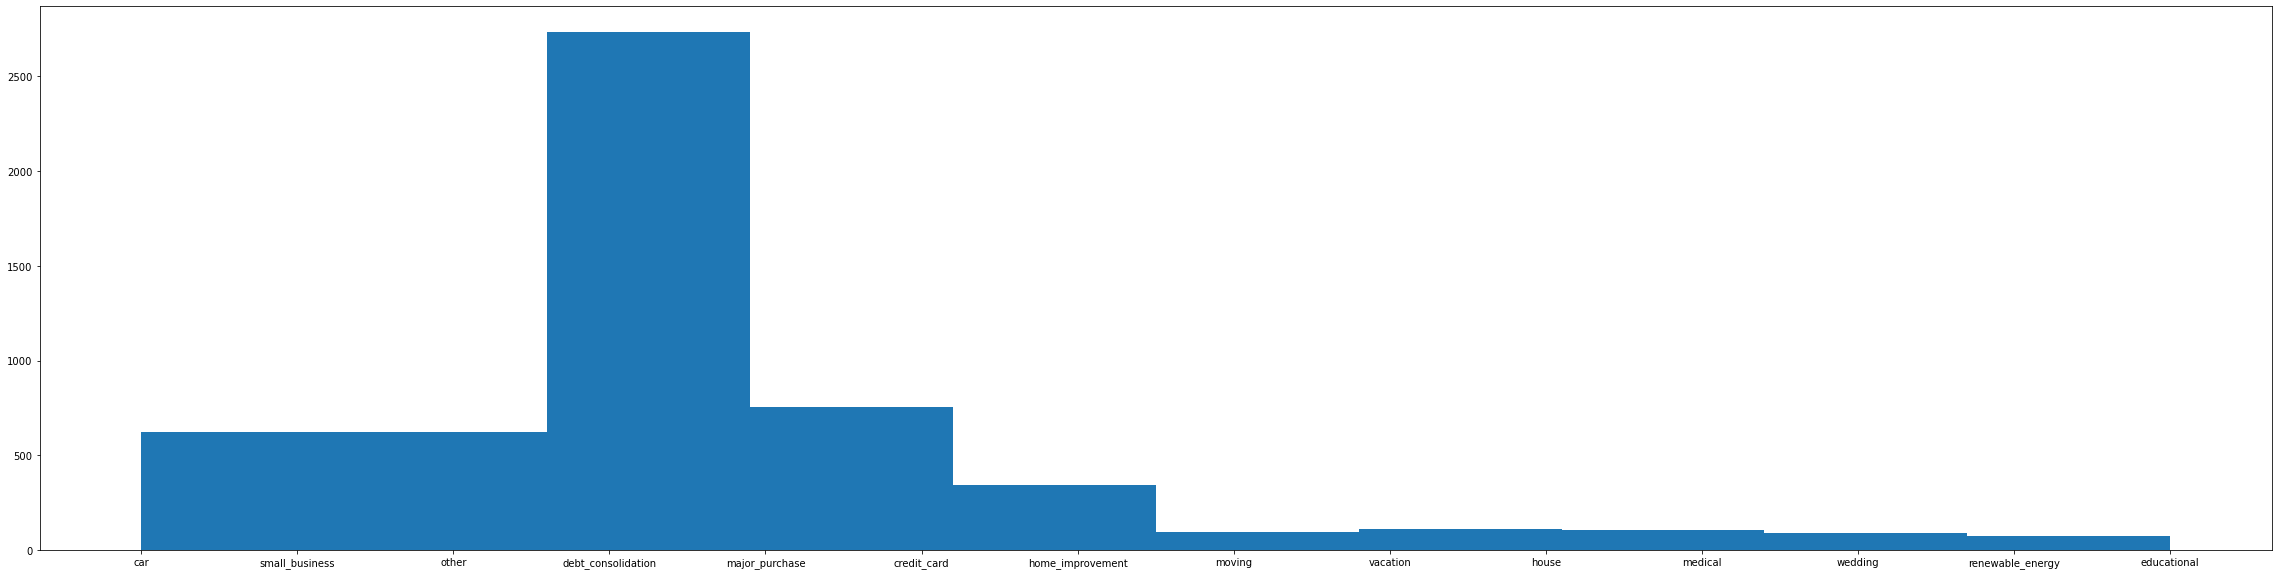

In [30]:
plt.figure(figsize=(40,10))
plt.hist(defaulter.purpose)
plt.show()

In [39]:
defaulter.grade.value_counts()

B    1410
C    1318
D    1102
E     704
A     596
F     316
G      97
Name: grade, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x12d5d5a1fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x12d5d5b66a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d5d5a1bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x12d5d5b6dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d5d5c2190>],
 'means': []}

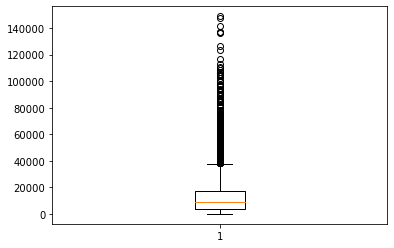

In [41]:
plt.boxplot(defaulter.revol_bal)

In [42]:
defaulter.revol_bal.describe()

count      5543.00000
mean      13632.22551
std       15215.79527
min           0.00000
25%        4050.50000
50%        9323.00000
75%       17624.50000
max      148829.00000
Name: revol_bal, dtype: float64